In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Annotation (`pyannote.core.annotation.Annotation`)

In [3]:
from pyannote.core import Annotation


**`Annotation`** instances are used to describe sets of annotated temporal fragments.  
For instance, one can use an **`Annotation`** to store the result of speaker identification approach applied on an episode of *The Big Bang Theory* TV series.

In [4]:
annotation = Annotation(
    uri='TheBigBangTheory.Season01.Episode01', 
    modality='speaker'
)

For instance, to represent a dialogue between Penny and Leonard, we could do the following:

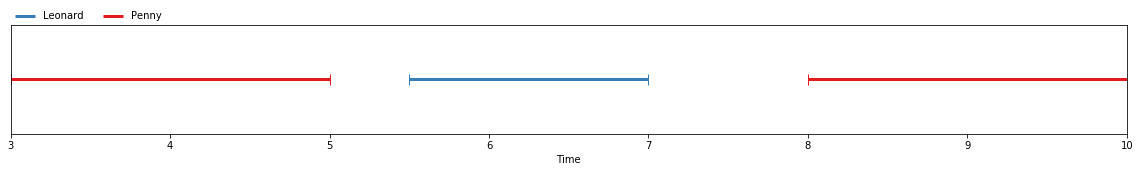

In [5]:
from pyannote.core import Segment
annotation[Segment(3, 5)] = 'Penny'
annotation[Segment(5.5, 7)] = 'Leonard'
annotation[Segment(8, 10)] = 'Penny'
annotation

Now, suppose (super-annoying) Sheldon speaks over Penny's second speech turn.

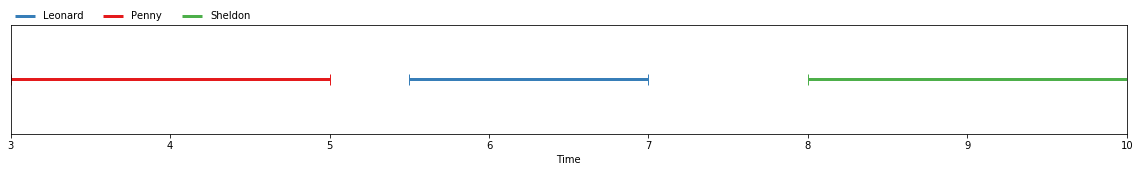

In [6]:
annotation[Segment(8, 10)] = 'Sheldon'
annotation

Damn, Sheldon! That's not what we wanted! We did not want to replace Penny by Sheldon. Instead, we wanted to show that both characters are speaking at the very same time.  
To achieve this, we need to create a new track for the same segment.

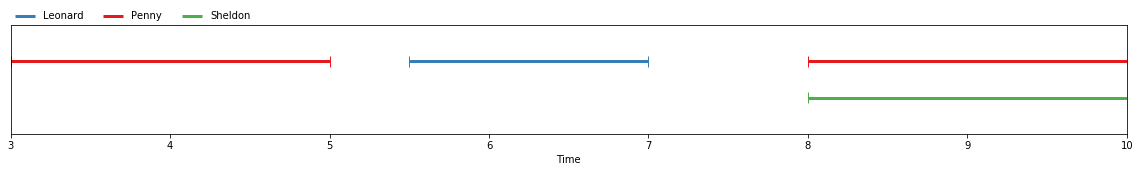

In [7]:
segment = Segment(8, 10)
annotation[segment, annotation.new_track(segment)] = 'Penny'
annotation

That's much better!
A track cannot be identified by a segment alone: it is uniquely identified by a 2-tuple (segment, track_identifier).

In fact, the **new_track** method is simply an helper function to help you generate new track identifiers for a given segment.
And the previous lines are in fact shortcuts for the following:

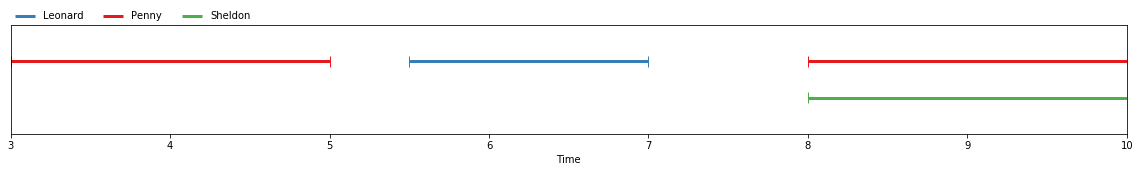

In [8]:
annotation = Annotation(
    uri='TheBigBangTheory.Season01.Episode01', 
    modality='speaker'
)
annotation[Segment(3, 5), '_'] = 'Penny'
annotation[Segment(5.5, 7), '_',] = 'Leonard'
annotation[Segment(8, 10), '_'] = 'Penny'
annotation[Segment(8, 10), 'anything'] = 'Sheldon'
annotation

`_` is the default track identifier (in case you are sure that each segment has only one associated track).  Generally, you should avoid using the shortcut `annotation[segment]` and always add a track identifier of your choosing. 

## Iterating over segments, tracks and/or labels

In [9]:
for segment in annotation.itersegments():
    print(segment)

[ 00:00:03.000 -->  00:00:05.000]
[ 00:00:05.500 -->  00:00:07.000]
[ 00:00:08.000 -->  00:00:10.000]


In [10]:
for segment, track in annotation.itertracks():
    print(segment, track)

[ 00:00:03.000 -->  00:00:05.000] _
[ 00:00:05.500 -->  00:00:07.000] _
[ 00:00:08.000 -->  00:00:10.000] _
[ 00:00:08.000 -->  00:00:10.000] anything


In [11]:
for segment, track, label in annotation.itertracks(yield_label=True):
    print(segment, track, label)

[ 00:00:03.000 -->  00:00:05.000] _ Penny
[ 00:00:05.500 -->  00:00:07.000] _ Leonard
[ 00:00:08.000 -->  00:00:10.000] _ Penny
[ 00:00:08.000 -->  00:00:10.000] anything Sheldon


## Dealing with segments

One can use the **get_timeline** method to obtain a [timeline](pyannote.core.timeline.ipynb) made of all segments (not tracks!) in the annotation

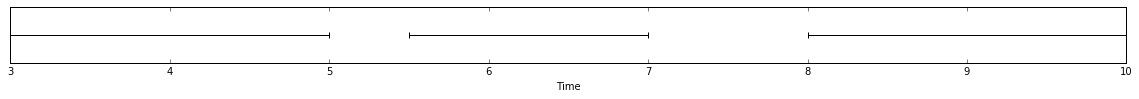

In [11]:
annotation.get_timeline()

## Dealing with tracks

Get all tracks for a given segment

In [12]:
annotation.get_tracks(Segment(8, 10))

{'_', 'anything'}

Check whether a given track exists

In [13]:
annotation.has_track(Segment(8, 10), '---')

False

One can re-initialize tracks as incrementing integer using **retrack** method. This also makes sure that no two tracks have the same identifier.

In [12]:
for segment, track in annotation.rename_tracks(generator='int').itertracks():
    print(segment, track)

[ 00:00:03.000 -->  00:00:05.000] 0
[ 00:00:05.500 -->  00:00:07.000] 1
[ 00:00:08.000 -->  00:00:10.000] 2
[ 00:00:08.000 -->  00:00:10.000] 3


## Dealing with labels

Get (sorted) list of unique labels

In [15]:
annotation.labels()

['Leonard', 'Penny', 'Sheldon']

List of labels for a given segment. Read the help message for more options.

In [16]:
annotation.get_labels(Segment(8, 10))

{'Penny', 'Sheldon'}

One may want to be more precise on the identiy of each speaker and replace character names by actor names. We can use **translate** to do just that:

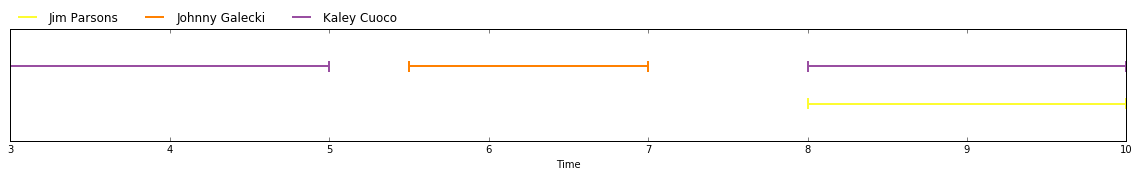

In [17]:
mapping = {'Penny': 'Kaley Cuoco', 'Sheldon': 'Jim Parsons', 'Leonard': 'Johnny Galecki'}
annotation.rename_labels(mapping=mapping)

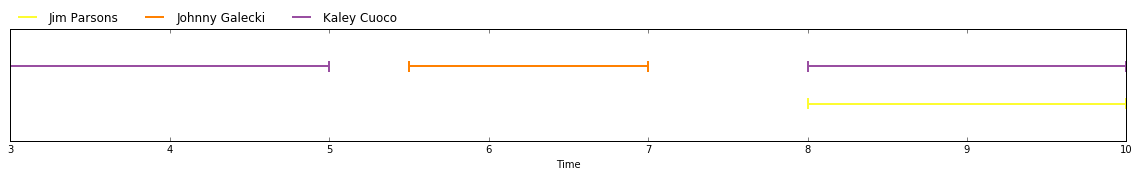

In [18]:
# this also used to work -- but no longer does
annotation % mapping

## Cropping and subsetting

The **crop** method works the same way it does for [timeline](pyannote.core.timeline.ipynb) instances.

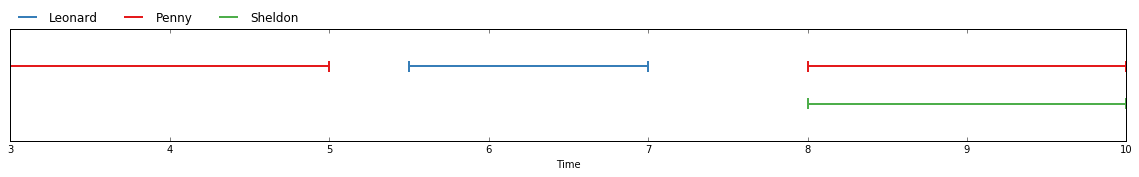

In [19]:
annotation

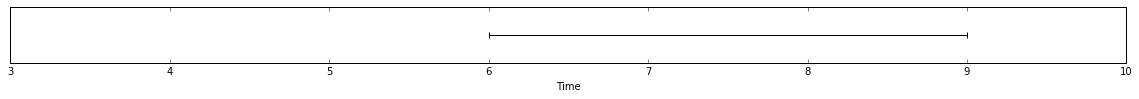

In [20]:
segment = Segment(6, 9)
segment

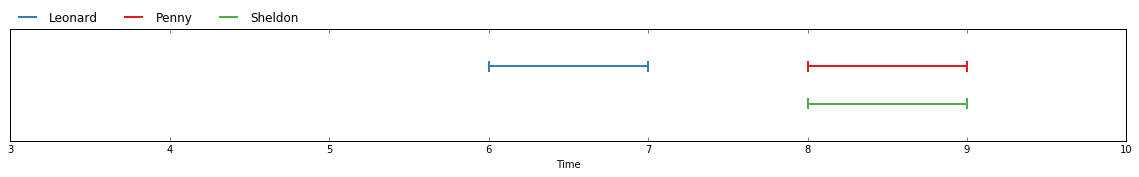

In [21]:
annotation.crop(segment)

The **subset** method allows to extract annotations based on their labels.

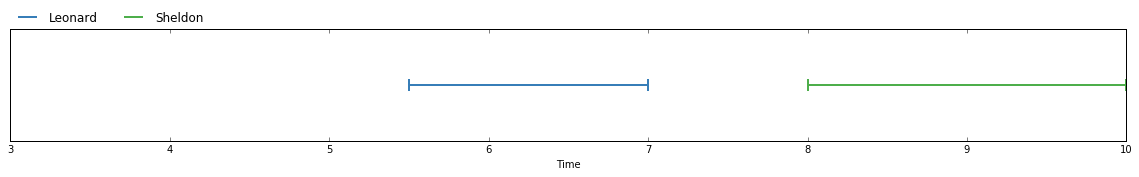

In [22]:
male_characters = set(['Sheldon', 'Leonard'])
annotation.subset(male_characters)

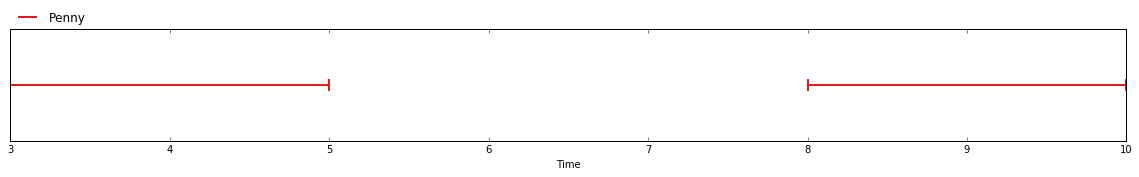

In [23]:
# all but male characters
annotation.subset(male_characters, invert=True)

## Analyzing annotations

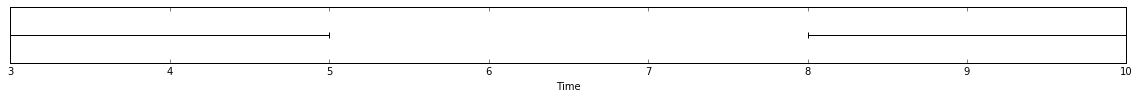

In [24]:
# timeline made of Penny's segments
annotation.label_timeline('Penny')

In [25]:
# total Penny's speech duration
print 'Penny spoke during %f seconds' % annotation.label_duration('Penny')

Penny spoke during 4.000000 seconds


In [26]:
# label chart based on their duration
annotation.chart()

[('Penny', 4), ('Sheldon', 2), ('Leonard', 1.5)]

In [27]:
# who is the biggest speaker?
annotation.argmax()

'Penny'

## Other operations

**co_iter** works the same way as for [timeline](pyannote.core.timeline.ipynb) except it iterates over overlapping (segment, track) tuples.

## Need help?

You can always try the following...  
Who knows? It might give you the information you are looking for!

In [28]:
help(Annotation)

Help on class Annotation in module pyannote.core.annotation:

class Annotation(__builtin__.object)
 |  Annotation
 |  
 |  Parameters
 |  ----------
 |  uri : string, optional
 |      uniform resource identifier of annotated document
 |  modality : string, optional
 |      name of annotated modality
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |  
 |  __contains__(self, included)
 |      Inclusion
 |      
 |      Use expression 'segment in annotation' or 'timeline in annotation'
 |      
 |      Parameters
 |      ----------
 |      included : `Segment` or `Timeline`
 |      
 |      Returns
 |      -------
 |      contains : bool
 |          True if every segment in `included` exists in annotation
 |          False otherwise
 |  
 |  __delitem__(self, key)
 |  
 |  __eq__(self, other)
 |  
 |  __getitem__(self, key)
 |      # label = annotation[segment, track]
 |  
 |  __init__(self, uri=None, modality=None)
 |  
 |  __len__(self)
 |      Number of segments
 |  
 |  __mod_